# FINANCIAL ANALYSIS OF TESLA INC. USING DATA SCIENCE TOOLS

<h1>Analysis of Historical Stock, Revenue, Gross Profit, Total Assets, Total Liabilities and Annual Net Cash Flow of Tesla</h1>
<h2>Description</h2>


### Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this, we will extract some:
### 1. Stock Data
### 2. Revenue Data
### 3. Gross Profit Data
### 4. Total Assets  
### 5. Total Liabilities
### 6. Annual Net Cash Flow
### and, we will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>1. Installing the required packages to python console</li>
        <li>2. Importing the packages to the python console</li>
        <li>3. Define the graph function</li>
        <li>4. Use yfinance for extract Tesla Inc. Stock Data</li>
        <li>5. Using Web Scrapping to extract Tesla Inc. Revenue Data</li>
        <li>6. Using Web Scrapping to extract Tesla Inc. Gross Profit Data</li>
        <li>7. Using Web Scrapping to extract Tesla Inc. Total Assets Data</li>
        <li>8. Using Web Scrapping to extract Tesla Inc. Total Liabilities Data</li>
        <li>8. Using Web Scrapping to extract Tesla Inc. Net Annual Cash Flow Data</li>
    </ul>
<p>
    Financial Data Extracted: <strong>https://www.macrotrends.net/</strong></p>
</div>

<hr>


## 1. Installing the required packages to python console

In [1]:
!mamba install bs4==4.10.0 -y 
!mamba install html5lib==1.1 -y 
!pip install yfinance==0.1.67
!pip install yfinance pandas tabulate
!pip install matplotlib
!pip install numpy==1.24.3
!pip install pandas==1.3.3 
!pip install requests==2.26.0 
!pip install lxml==4.6.4
!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

## 2. Importing the packages to the python console

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from tabulate import tabulate
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
import numpy as np

## 3. Define the graph function


#### In this section, we define the function make_graph. We don't have to know how the function works, we should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), a dataframe from gross profit data (dataframe must contain Date and Gross Profit columns), a dataframe with total assets data (dataframe must contain Date and Total Assets columns), a dataframe with total liabilities data (dataframe must contain Date and Total Liabilities columns)  and a dataframe with cashflow data (dataframe must contain Date and Cash Flow columns).

In [3]:
def make_graph(stock_data, revenue_data, profit_data, assets_data, market_cap_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue", "Gross Profit", "Total Assets", "Market Capitalization"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2023-06-06']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2023-06-06']
    gross_profit_data_specific = gross_profit_data[profit_data.Date <= '2023-06-06']
    total_assets_data_specific = total_assets_data[assets_data.Date <= '2023-06-06']
    total_liabilities_data_specific = total_liabilities_data[liabilities_data.Date <= '2023-06-06']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(gross_profit_data_specific.Date, infer_datetime_format=True), y=gross_profit_data_specific.Gross_Profit.astype("float"), name="Gross Profit"), row=2, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(total_assets_data_specific.Date, infer_datetime_format=True), y=total_assets_data_specific.Total_Assets.astype("float"), name="Total Assets"), row=2, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(total_liabilities_data_specific.Date, infer_datetime_format=True), y=total_liabilities_data_specific.Total_Liabilities.astype("float"), name="Total Liabilitiess"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($ US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue (Millions of US $)", row=2, col=1)
    fig.update_yaxes(title_text="Gross Profit (Millions of US $)", row=2, col=1)
    fig.update_yaxes(title_text="Total Assets (Millions of US $)", row=2, col=1)
    fig.update_yaxes(title_text="Total Liabilities (Millions of US $)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## 4. Use yfinance for extract Tesla Inc. Stock Data


#### Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [4]:
tesla = yf.Ticker("TSLA")

#### Using the ticker object extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to from 'start_date' to 'end_date' so we get information for the required amount of time.
#### Here, we have stock reports 1st April, 2023 to 6th April, 2023

In [5]:
ticker = "TSLA"
start_date = "2023-05-01"
end_date = "2023-06-26"

tesla_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


#### Creating the table from the pandas dataframe and using the tabulate function to visualize the data in the tabular form.

In [6]:
df = pd.DataFrame(tesla_data)
table = tabulate(df, headers='keys', tablefmt='fancy_grid')
print(table)

╒═════════════════════╤════════╤════════╤════════╤═════════╤═════════════╤═════════════╕
│ Date                │   Open │   High │    Low │   Close │   Adj Close │      Volume │
╞═════════════════════╪════════╪════════╪════════╪═════════╪═════════════╪═════════════╡
│ 2023-05-01 00:00:00 │ 163.17 │ 163.28 │ 158.83 │  161.83 │      161.83 │ 1.09015e+08 │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2023-05-02 00:00:00 │ 161.88 │ 165.49 │ 158.93 │  160.31 │      160.31 │ 1.2826e+08  │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2023-05-03 00:00:00 │ 160.01 │ 165    │ 159.91 │  160.61 │      160.61 │ 1.19728e+08 │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2023-05-04 00:00:00 │ 162.71 │ 162.95 │ 159.65 │  161.2  │      161.2  │ 9.51085e+07 │
├─────────────────────┼────────┼────────┼────────┼─────────┼─────────────┼─────────────┤
│ 2023-05-05 00:00:00

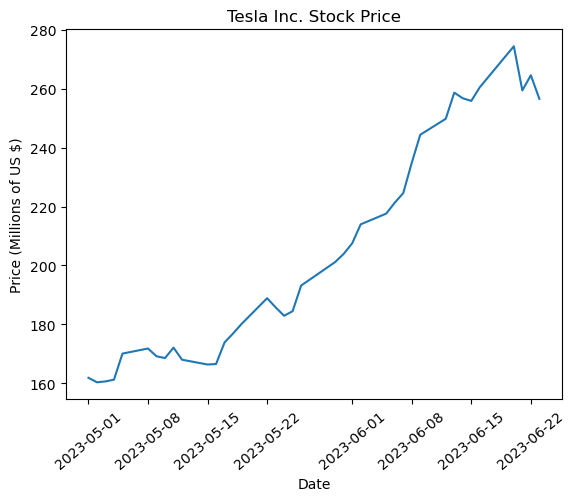

In [7]:
# Plot the 'Close' price
plt.plot(df.index, df['Close'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price (Millions of US $)')
plt.title('Tesla Inc. Stock Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=40)

# Display the plot
plt.show()

In [8]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500
2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900


In [9]:
tesla_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-16,258.920013,263.600006,257.209991,260.540009,260.540009,167563700
2023-06-20,261.500000,274.750000,261.119995,274.450012,274.450012,165611200
2023-06-21,275.130005,276.989990,257.779999,259.459991,259.459991,211797100
2023-06-22,250.770004,265.000000,248.250000,264.609985,264.609985,166875900
2023-06-23,259.290009,262.450012,252.800003,256.600006,256.600006,176584100


                  Open        High         Low       Close     Volume  \
Date                                                                    
2021-06-24  224.996674  232.539993  222.536667  226.606674  137947200   
2021-06-25  229.860001  231.270004  222.899994  223.956665   97490100   
2021-06-28  223.880005  231.566666  223.440002  229.573334   64884600   
2021-06-29  228.216660  229.169998  225.296661  226.919998   52143900   
2021-06-30  226.589996  230.936661  226.046661  226.566666   56774700   
...                ...         ...         ...         ...        ...   
2023-06-16  258.920013  263.600006  257.209991  260.540009  167563700   
2023-06-20  261.500000  274.750000  261.119995  274.450012  165611200   
2023-06-21  275.130005  276.989990  257.779999  259.459991  211797100   
2023-06-22  250.770004  265.000000  248.250000  264.609985  166875900   
2023-06-23  259.290009  262.450012  252.800003  256.600006  176584100   

            Dividends  Stock Splits  
Date        

<AxesSubplot:xlabel='Date'>

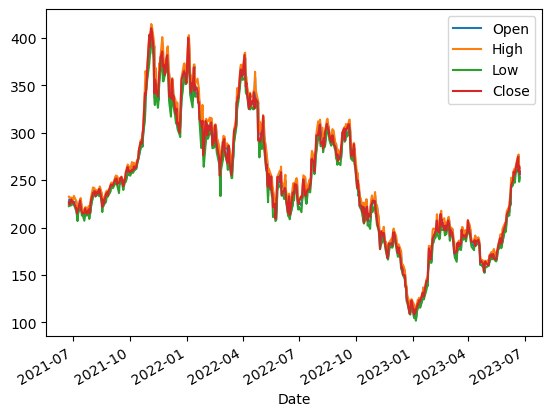

In [10]:
data = tesla.history(period="2y")
df = pd.DataFrame(data)
print(df)
df.plot(y=["Open", "High", "Low", "Close"], kind="line")

## 5. Using Web Scrapping to extract Tesla Inc. Revenue Data


In [11]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
html_content = response.content

Parse the html data using `beautiful_soup`.


In [12]:
soup = BeautifulSoup(html_content, "html.parser")
revenue_table = soup.find("table", class_="historical_data_table")
rows = revenue_table.find_all("tr")

<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [13]:
revenue_data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    year = cells[0].text.strip()
    revenue = cells[1].text.strip()
    revenue_data.append([year, revenue])

In [14]:
table_headers = ["Year", "Revenue (Millions of US $)"]
table = tabulate(revenue_data, headers=table_headers, tablefmt="fancy_grid")
print(table)


╒════════╤══════════════════════════════╕
│   Year │ Revenue (Millions of US $)   │
╞════════╪══════════════════════════════╡
│   2022 │ $81,462                      │
├────────┼──────────────────────────────┤
│   2021 │ $53,823                      │
├────────┼──────────────────────────────┤
│   2020 │ $31,536                      │
├────────┼──────────────────────────────┤
│   2019 │ $24,578                      │
├────────┼──────────────────────────────┤
│   2018 │ $21,461                      │
├────────┼──────────────────────────────┤
│   2017 │ $11,759                      │
├────────┼──────────────────────────────┤
│   2016 │ $7,000                       │
├────────┼──────────────────────────────┤
│   2015 │ $4,046                       │
├────────┼──────────────────────────────┤
│   2014 │ $3,198                       │
├────────┼──────────────────────────────┤
│   2013 │ $2,013                       │
├────────┼──────────────────────────────┤
│   2012 │ $413                   

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


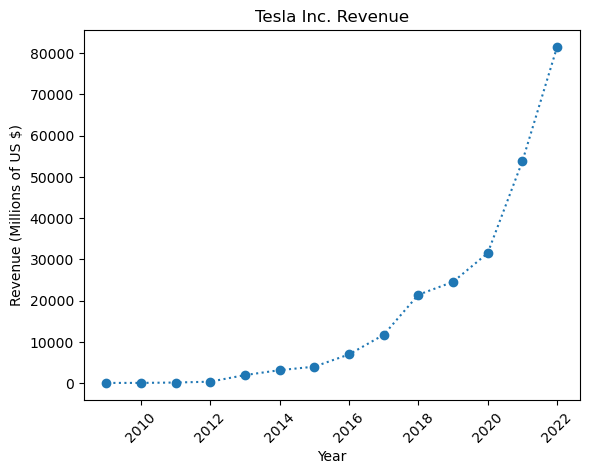

In [15]:
df = pd.DataFrame(revenue_data, columns=['Year', 'Revenue'])
df['Year'] = pd.to_datetime(df['Year'])
df['Revenue'] = pd.to_numeric(df['Revenue'].str.replace('$', '').str.replace(',', ''))
plt.plot(df['Year'], df['Revenue'], linestyle=':', marker='o')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions of US $)')
plt.title('Tesla Inc. Revenue')
plt.xticks(rotation=45)
plt.show()

In [16]:
revenue_data = []
for row in rows[1:]:
    cells = row.find_all("td")
    year = cells[0].text.strip()
    if "2017" <= year <= "2022":
        revenue = cells[1].text.strip()
        revenue_data.append([year, revenue])

In [17]:
table_headers = ["Year", "Revenue (Millions of US $)"]
table = tabulate(revenue_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════╤══════════════════════════════╕
│   Year │ Revenue (Millions of US $)   │
╞════════╪══════════════════════════════╡
│   2022 │ $81,462                      │
├────────┼──────────────────────────────┤
│   2021 │ $53,823                      │
├────────┼──────────────────────────────┤
│   2020 │ $31,536                      │
├────────┼──────────────────────────────┤
│   2019 │ $24,578                      │
├────────┼──────────────────────────────┤
│   2018 │ $21,461                      │
├────────┼──────────────────────────────┤
│   2017 │ $11,759                      │
╘════════╧══════════════════════════════╛


In [18]:
revenue_data = {}
for row in rows[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    if "2017" <= date <= "2020":
        revenue = cells[1].text.strip().replace("$", "").replace(",", "")
        revenue_data[date] = float(revenue)

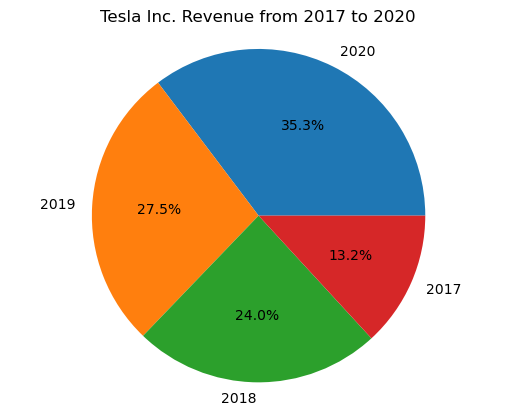

In [19]:
labels = list(revenue_data.keys())
values = list(revenue_data.values())

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Tesla Inc. Revenue from 2017 to 2020')
plt.axis('equal')
plt.show()


## 6. Using Web Scrapping to extract Tesla Inc. Gross Profit Data

In [20]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/gross-profit"
response = requests.get(url)
html_content = response.content

In [21]:
soup = BeautifulSoup(html_content, "html.parser")
profit_table = soup.find("table", class_="historical_data_table")
rows = profit_table.find_all("tr")

In [22]:
profit_data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    date = cells[0].text.strip()
    profit = cells[1].text.strip()
    profit_data.append([date, profit])

In [23]:
table_headers = ["Date(in year)", "Gross Profit (Millions of US $)"]
table = tabulate(profit_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒═════════════════╤═══════════════════════════════════╕
│   Date(in year) │ Gross Profit (Millions of US $)   │
╞═════════════════╪═══════════════════════════════════╡
│            2022 │ $20,853                           │
├─────────────────┼───────────────────────────────────┤
│            2021 │ $13,606                           │
├─────────────────┼───────────────────────────────────┤
│            2020 │ $6,630                            │
├─────────────────┼───────────────────────────────────┤
│            2019 │ $4,069                            │
├─────────────────┼───────────────────────────────────┤
│            2018 │ $4,042                            │
├─────────────────┼───────────────────────────────────┤
│            2017 │ $2,223                            │
├─────────────────┼───────────────────────────────────┤
│            2016 │ $1,599                            │
├─────────────────┼───────────────────────────────────┤
│            2015 │ $924                        

In [24]:
dates = []
profits = []
for row in rows[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    profit = cells[1].text.strip().replace("$", "").replace(",", "")
    dates.append(date)
    profits.append(float(profit))

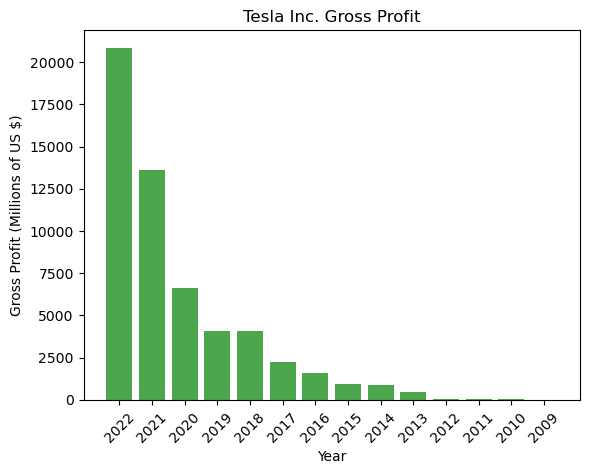

In [25]:
plt.bar(dates, profits, color='green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Gross Profit (Millions of US $)')
plt.title('Tesla Inc. Gross Profit')
plt.xticks(rotation=45)
plt.show()

In [26]:
profit_data = []
for row in rows[1:]:
    cells = row.find_all("td")
    year = cells[0].text.strip()
    if "2017" <= year <= "2022":
        profit = cells[1].text.strip()
        profit_data.append([year, profit])

In [27]:
table_headers = ["Year", "Gross Profit (Millions of US $)"]
table = tabulate(profit_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════╤═══════════════════════════════════╕
│   Year │ Gross Profit (Millions of US $)   │
╞════════╪═══════════════════════════════════╡
│   2022 │ $20,853                           │
├────────┼───────────────────────────────────┤
│   2021 │ $13,606                           │
├────────┼───────────────────────────────────┤
│   2020 │ $6,630                            │
├────────┼───────────────────────────────────┤
│   2019 │ $4,069                            │
├────────┼───────────────────────────────────┤
│   2018 │ $4,042                            │
├────────┼───────────────────────────────────┤
│   2017 │ $2,223                            │
╘════════╧═══════════════════════════════════╛


In [28]:
profit_data = {}
for row in rows[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    if "2017" <= date <= "2020":
        profit = cells[1].text.strip().replace("$", "").replace(",", "")
        profit_data[date] = float(profit)

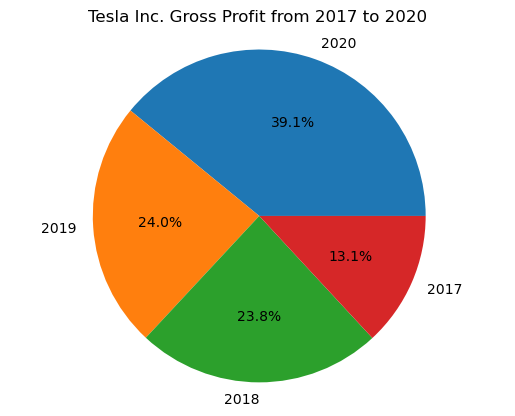

In [29]:
labels = list(profit_data.keys())
values = list(profit_data.values())

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Tesla Inc. Gross Profit from 2017 to 2020')
plt.axis('equal')
plt.show()

## 7. Using Web Scrapping to extract Tesla Inc. Total Assets Data

In [30]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/total-assets"
response = requests.get(url)
html_content = response.content

In [31]:
soup = BeautifulSoup(html_content, "html.parser")
assets_table = soup.find("table", class_="historical_data_table")
rows = assets_table.find_all("tr")

In [32]:
assets_data = []
for row in rows[1:]:
    cells = row.find_all("td")
    year = cells[0].text.strip()
    assets = cells[1].text.strip()
    assets_data.append([year, assets])

In [33]:
table_headers = ["Year", "Total Assets (Millions of US $)"]
table = tabulate(assets_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════╤═══════════════════════════════════╕
│   Year │ Total Assets (Millions of US $)   │
╞════════╪═══════════════════════════════════╡
│   2022 │ $82,338                           │
├────────┼───────────────────────────────────┤
│   2021 │ $62,131                           │
├────────┼───────────────────────────────────┤
│   2020 │ $52,148                           │
├────────┼───────────────────────────────────┤
│   2019 │ $34,309                           │
├────────┼───────────────────────────────────┤
│   2018 │ $29,740                           │
├────────┼───────────────────────────────────┤
│   2017 │ $28,655                           │
├────────┼───────────────────────────────────┤
│   2016 │ $22,664                           │
├────────┼───────────────────────────────────┤
│   2015 │ $8,068                            │
├────────┼───────────────────────────────────┤
│   2014 │ $5,831                            │
├────────┼───────────────────────────────────┤
│   2013 │ $2

In [34]:
dates = []
assets = []
for row in rows[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    asset_value = cells[1].text.strip().replace("$", "").replace(",", "")
    dates.append(date)
    assets.append(float(asset_value))

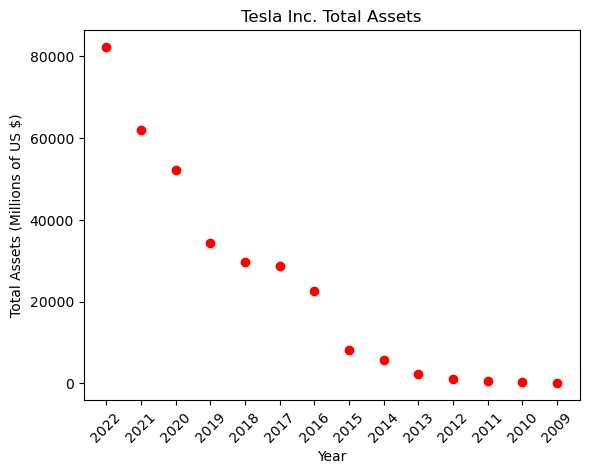

In [35]:
plt.scatter(dates, assets, color='r')
plt.title("Tesla Inc. Total Assets")
plt.xlabel("Year")
plt.ylabel("Total Assets (Millions of US $)")
plt.xticks(rotation=45)
plt.show()

## 8. Using Web Scrapping to extract Tesla Inc. Total Liabilities Data

In [36]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/total-liabilities"
response = requests.get(url)
html_content = response.content

In [37]:
soup = BeautifulSoup(html_content, "html.parser")
liabilities_table = soup.find("table", class_="historical_data_table")
rows = liabilities_table.find_all("tr")

In [38]:
liabilities_data = []
for row in rows[1:]:
    cells = row.find_all("td")
    year = cells[0].text.strip()
    liabilities = cells[1].text.strip()
    liabilities_data.append([year, liabilities])

In [39]:
table_headers = ["Year", "Total Liabilities (Millions of US $)"]
table = tabulate(liabilities_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════╤════════════════════════════════════════╕
│   Year │ Total Liabilities (Millions of US $)   │
╞════════╪════════════════════════════════════════╡
│   2022 │ $36,849                                │
├────────┼────────────────────────────────────────┤
│   2021 │ $31,116                                │
├────────┼────────────────────────────────────────┤
│   2020 │ $29,073                                │
├────────┼────────────────────────────────────────┤
│   2019 │ $26,842                                │
├────────┼────────────────────────────────────────┤
│   2018 │ $23,983                                │
├────────┼────────────────────────────────────────┤
│   2017 │ $23,421                                │
├────────┼────────────────────────────────────────┤
│   2016 │ $17,126                                │
├────────┼────────────────────────────────────────┤
│   2015 │ $6,984                                 │
├────────┼────────────────────────────────────────┤
│   2014 │ $

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


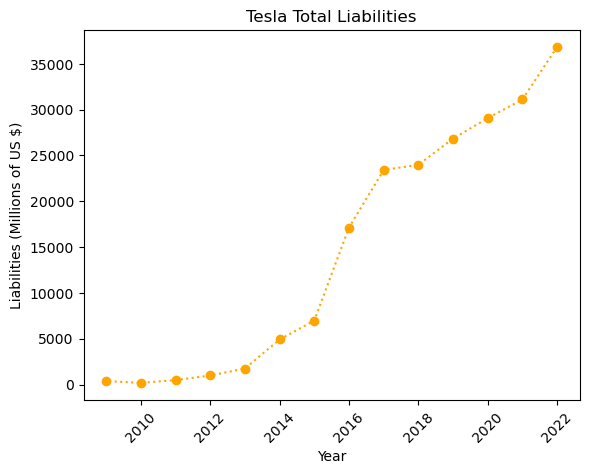

In [40]:
df = pd.DataFrame(liabilities_data, columns=['Year', 'Liabilities'])
df['Year'] = pd.to_datetime(df['Year'])
df['Liabilities'] = pd.to_numeric(df['Liabilities'].str.replace('$', '').str.replace(',', ''))
plt.plot(df['Year'], df['Liabilities'], linestyle=':', marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Liabilities (Millions of US $)')
plt.title('Tesla Total Liabilities')
plt.xticks(rotation=45)
plt.show()

## 9. Using Web Scrapping to extract Tesla Inc. Annual Net Cash Flow Data

In [41]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/net-cash-flow"
response = requests.get(url)
html_content = response.content

In [42]:
soup = BeautifulSoup(html_content, "html.parser")
cashflow_table = soup.find("table", class_="historical_data_table")
rows = cashflow_table.find_all("tr")

In [43]:
cashflow_data = []
for row in rows[1:]:
    cells = row.find_all("td")
    year = cells[0].text.strip()
    cashflow = cells[1].text.strip()
    cashflow_data.append([year, liabilities])

In [44]:
table_headers = ["Year", " Annual Net Cash Flow (Millions of US $)"]
table = tabulate(liabilities_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════╤════════════════════════════════════════════╕
│   Year │  Annual Net Cash Flow (Millions of US $)   │
╞════════╪════════════════════════════════════════════╡
│   2022 │ $36,849                                    │
├────────┼────────────────────────────────────────────┤
│   2021 │ $31,116                                    │
├────────┼────────────────────────────────────────────┤
│   2020 │ $29,073                                    │
├────────┼────────────────────────────────────────────┤
│   2019 │ $26,842                                    │
├────────┼────────────────────────────────────────────┤
│   2018 │ $23,983                                    │
├────────┼────────────────────────────────────────────┤
│   2017 │ $23,421                                    │
├────────┼────────────────────────────────────────────┤
│   2016 │ $17,126                                    │
├────────┼────────────────────────────────────────────┤
│   2015 │ $6,984                               